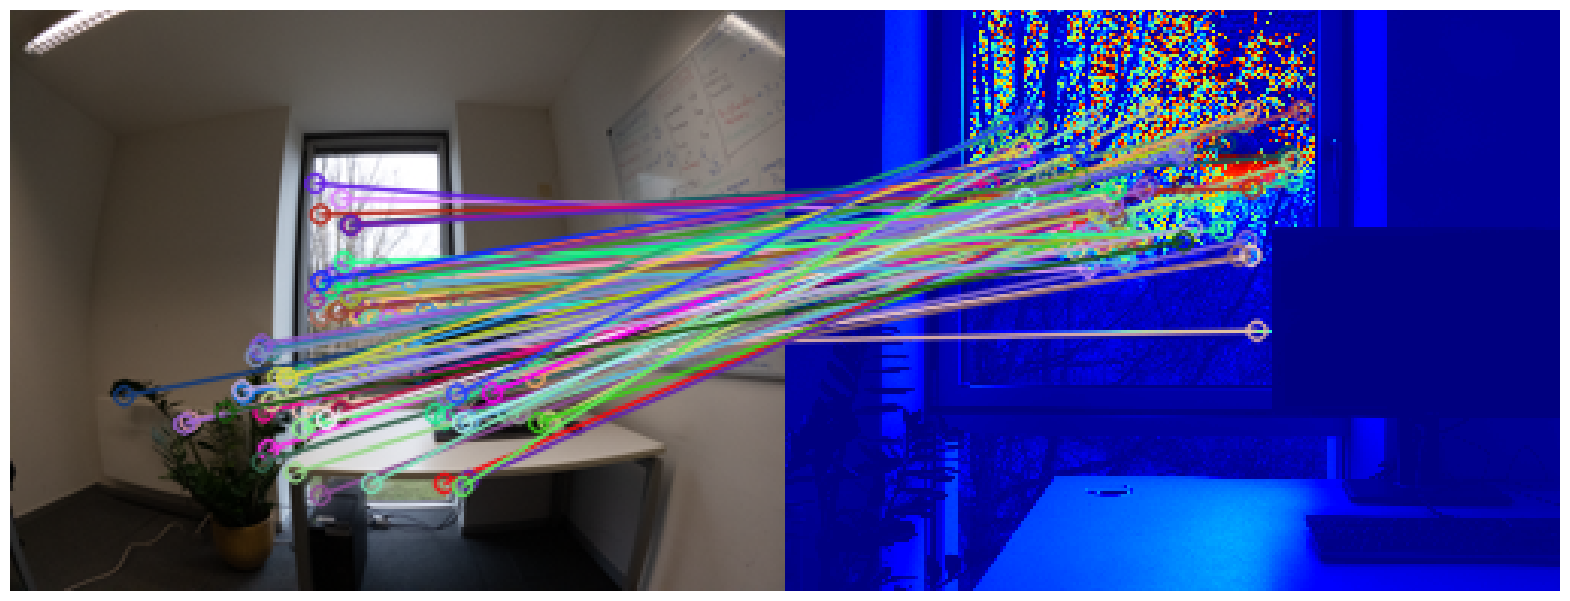

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageSequence

def resize_image_to_match(target_image_path, reference_shape):
    """
    Resize the target image to match the dimensions of the reference shape.
    """
    target = cv2.imread(target_image_path)
    resized_target = cv2.resize(target, (reference_shape[1], reference_shape[0]))
    return resized_target

def feature_matching(reference_image_path, target, save_path=None):
    # Load the reference image
    reference = cv2.imread(reference_image_path)
    
    # Convert the images from BGR to RGB
    reference_rgb = cv2.cvtColor(reference, cv2.COLOR_BGR2RGB)
    
    # If target is a numpy array, keep as is. Otherwise, read from the path
    if isinstance(target, np.ndarray):
        target_rgb = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)
    else:
        target = cv2.imread(target)
        target_rgb = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)

    # Detect ORB keypoints and compute descriptors
    orb = cv2.ORB_create()
    keypoints_ref, descriptors_ref = orb.detectAndCompute(reference, None)
    keypoints_target, descriptors_target = orb.detectAndCompute(target, None)

    # Use BFMatcher to find the best matches
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptors_ref, descriptors_target)
    
    # Keep only good matches
    matches = sorted(matches, key=lambda x: x.distance)
    good_matches = matches[:100]  # Keep top 50 matches for visualization

    # Draw matches
    result = cv2.drawMatches(reference_rgb, keypoints_ref, target_rgb, keypoints_target, good_matches, None, flags=2)
    
    if save_path:
        plt.figure(figsize=(20, 20))
        plt.imshow(result)
        plt.axis('off')
        plt.savefig(save_path, dpi=300, bbox_inches='tight', pad_inches=0)

    return result

def create_gif(images, gif_path):
    # Convert images to PIL format
    pil_images = [Image.fromarray(img) for img in images]
    
    # Create the GIF
    pil_images[0].save(gif_path, save_all=True, append_images=pil_images[1:], loop=0, duration=1000, optimize=False)

# Paths to your images
reference_image_path = 'gopro10photo_20230310T0930.dng'
target_image_path = 'scone_1_colorful_930.png'

# Resize the target image to match the reference image's size
reference_shape = cv2.imread(reference_image_path).shape
resized_target = resize_image_to_match(target_image_path, reference_shape)

# Feature matching between the reference and resized target
matched_image_path = 'feature_matched_image_15.png'
matched_image = feature_matching(reference_image_path, resized_target, matched_image_path)

# Create the GIF
gif_path = "feature_matching_visualization_with_keypoints_150.gif"
create_gif([cv2.cvtColor(cv2.imread(reference_image_path), cv2.COLOR_BGR2RGB), cv2.cvtColor(resized_target, cv2.COLOR_BGR2RGB), matched_image], gif_path)
